In [1]:
import pandas as pd

data = pd.read_csv('data/ab_data_tourist.zip')

data.head()

,user_id,date,group,purchase,price
0,851104,2021-01-21,A,0,0
1,804228,2021-01-12,A,0,0
2,661590,2021-01-11,B,0,0
3,853541,2021-01-08,B,0,0
4,864975,2021-01-21,A,1,150000


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   294478 non-null  int64 
 1   date      294478 non-null  object
 2   group     294478 non-null  object
 3   purchase  294478 non-null  int64 
 4   price     294478 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 11.2+ MB


In [3]:
data['date'] = pd.to_datetime(data['date'])
data_date = data.groupby('group')['date'].agg(['min', 'max'])
display(data_date)

,min,max
group,,
A,2021-01-02,2021-01-24
B,2021-01-02,2021-01-24


In [4]:
group_cols = {'user_id': 'count', 'purchase':'sum', 'price': 'sum'}
data_conv = data.groupby('group', as_index=False).agg(group_cols)
display(data_conv)


,group,user_id,purchase,price
0,A,147202,17723,1436260000
1,B,147276,17514,1554100000


In [5]:
users_a = set(data['user_id'][data['group'] == 'A'])
users_b = set(data['user_id'][data['group'] == 'B'])
users_intersection = users_a.intersection(users_b)
print(len(users_a), len(users_b), len(users_intersection))

146195 146284 1895


In [6]:
updated_data = data[data['user_id'].apply(lambda x : x not in users_intersection)]
print(updated_data.shape, updated_data['user_id'].nunique() == (len(users_a) + len(users_b) - 2 * len(users_intersection)))

(290688, 5) True


In [9]:
data_1 = updated_data.groupby('group', as_index=False).agg(group_cols)
data_1.rename(columns={'user_id': 'count_visits', 'purchase': 'count_purchases', 'price': 'sum_price'}, inplace=True)
display(data_1)

,group,count_visits,count_purchases,sum_price
0,A,145307,17487,1417780000
1,B,145381,17290,1533010000


In [10]:
# Task 7.6

data_1['conversion'] = data_1['count_purchases'] / data_1['count_visits'] * 100
# data_1['conversion2'] = round(data_1['count_purchases'] / data_1['count_visits'] * 100, 2)
data_1['mean_check'] = data_1['sum_price'] / data_1['count_purchases']
# data_1['mean_check2'] = round(data_1['sum_price'] / data_1['count_purchases'])

display(data_1)

,group,count_visits,count_purchases,sum_price,conversion,mean_check
0,A,145307,17487,1417780000,12.034520,81076.228055
1,B,145381,17290,1533010000,11.892888,88664.545980


price,0,10000,60000,100000,150000,200000
group,,,,,,
A,0,5182,5271,1832,3478,1724
B,0,5201,1730,5227,3438,1694


<AxesSubplot: xlabel='price', ylabel='group'>

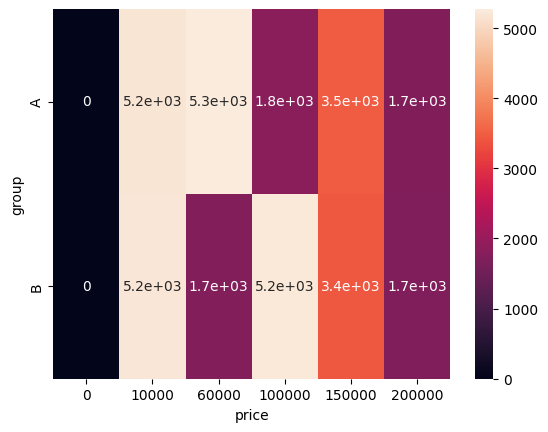

In [38]:
# Task 7.7 ?????
import seaborn as sns
# buffer = updated_data.pivot_table(index='price', columns='group', values='purchase')
buffer = updated_data.groupby(['group', 'price'], as_index=False)['purchase'].sum()
buffer = buffer.pivot_table(index='group', columns='price', values='purchase')
display(buffer)
sns.heatmap(buffer, annot=True)